# 안녕하세요^^ 
# AIVLE 미니 프로젝트3차 팀 미션입니다. 
# 주어진 문제를 잘 읽고 해결하시길 바랍니다.


## 올레TV 예능 콘텐츠 중 하나인 프로그램 "코미디빅리그"의 영상을 분석하고 코너를 분류하는 AI 모델을 만들어 보세요.

"코미디빅리그" 는 tvN에서 방영 중인 서바이벌 형식의 공개 코미디 프로그램으로 3개월 단위로 인기 코너를 선정하는 방식인 쿼제를 도입하고 있다. 
이번 과제는 2022년 1쿼터(1~3월) 방영분 중 2월 방영한 3편을 학습 데이터로 하여 3월 방송의 코너 구간을 추출해내는 것입니다.

아래의 조건들을 참고하여 문제를 해결하세요.
> - 주어진 데이터 ( Train 데이터 :  2월 방영분 3편 / Test 데이터 : 3월 방영분 1편 )
> - 제출 파일은 <font color="red">.ipynb 파일</font>과  조에서 각 과정마다 문제 해결을 위해 진행한 방법을 정리한 <font color="red">발표자료(.pptx)</font>를 포함히여 제출합니다.<br> 
①데이터 분석 및 학습데이터 생성, ②데이터 전처리, ③AI 모델링(아키텍처, 성능비교), ④분류 결과 <br> 
※ 각 과정은 문제 해결 방법에 따라 변경 가능<br><br>
> <b>제출 파일( 압축파일명 : [팀]미니프로젝트3차_AI 0반_00조.zip) </b> <br>
>> ① 코드 : [팀]미니프로젝트3차_AI 0반_00조.ipynb <br>
>> ② 발표자료 : [팀]미니프로젝트3차_AI 0반 00조.pptx <br>




---

# 0. 환경 설정하기

### 1) 구글 드라이브 연결하기

In [ ]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2) 경로 확인하기

In [ ]:
# ROOT_PATH 확인 
'''
import os

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = "/content/drive/MyDrive/AIVLE_3rd[Team]"
else :
  ROOT_PATH = os.path.abspath('..')

# 비디오 파일이 저장되어 있는 폴더
VIDEO_PATH = ROOT_PATH + "/video"

# 모델 학습을 위한 데이터 
TRAIN_PATH = ROOT_PATH + "/train"
# 모델 예측을 위한 test 데이터
TEST_PATH = ROOT_PATH + "/test"
'''

'\nimport os\n\nif os.getcwd() == \'/content\' :\n  # 구글 드라이브 사용 시 \n  ROOT_PATH = "/content/drive/MyDrive/AIVLE_3rd[Team]"\nelse :\n  ROOT_PATH = os.path.abspath(\'..\')\n\n# 비디오 파일이 저장되어 있는 폴더\nVIDEO_PATH = ROOT_PATH + "/video"\n\n# 모델 학습을 위한 데이터 \nTRAIN_PATH = ROOT_PATH + "/train"\n# 모델 예측을 위한 test 데이터\nTEST_PATH = ROOT_PATH + "/test"\n'

### 3) 영상 데이터 다운로드하기
아래 코드를 실행하세요.

In [ ]:
# test data 다운로드
'''
!pip install gdown

import gdown
import shutil

google_path = 'https://drive.google.com/uc?id='
file_id = file_id = "1p4up6pPd0NqUIaf6mlc2mq12r6NYGDOI"
output_name = 'video.zip'

gdown.download(google_path+file_id,output_name,quiet=False)

shutil.move("./" + output_name, ROOT_PATH)

import zipfile

with zipfile.ZipFile(ROOT_PATH + "/video.zip") as z:
    z.extractall(ROOT_PATH)
'''

ERROR: Operation cancelled by user
Access denied with the following error:



 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1p4up6pPd0NqUIaf6mlc2mq12r6NYGDOI 



NameError: ignored

# 미니프로젝트 3차 팀 미션 지금부터 시작하세요!

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
import glob
ROOT_PATH = "/content/drive/MyDrive"+ "/cobig_project"
TRAIN_IMG_PATH = ROOT_PATH + "/train1" 


train_list = glob.glob(TRAIN_IMG_PATH + '/*/*.jpg') 
print(train_list)


['/content/drive/MyDrive/cobig_project/train1/코빅엔터/3.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/6.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/9.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/18.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/24.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/36.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/30.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/15.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/27.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/33.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/21.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/12.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/39.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/48.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/42.jpg', '/content/drive/MyDrive/cob

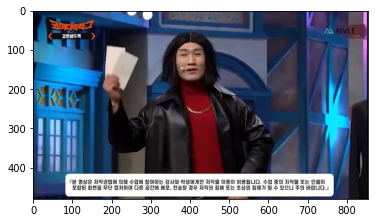

In [ ]:
img = cv2.imread('/content/drive/MyDrive//cobig_project/train1/결혼해두목/18.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
from PIL import Image
 
image1 = Image.open("/content/drive/MyDrive/cobig_project/train1/결혼해두목/0 (1).jpg")

image1.show()

imag1_size = image1.size

width, height = imag1_size
print(width, height)

FileNotFoundError: ignored

In [ ]:
#x_pos, y_pos, width, height = cv2.selectROI("location", img, False)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
'''
x_pos, y_pos, width, height = cv2.selectROI("location", img, False)
print("x_position, y_position : ", x_pos, y_pos)
print("width, height : ", width, height)
cv2.destroyAllWindows()
'''

In [ ]:
from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2


In [ ]:
/content/drive/MyDrive/cobig_project/train1

In [ ]:
src = cv2.imread("/content/drive/MyDrive/cobig_project/train1/결혼해두목/0 (1).jpg")

In [ ]:
from google.colab.patches import cv2_imshow


In [ ]:
cv2_imshow(src)

AttributeError: ignored

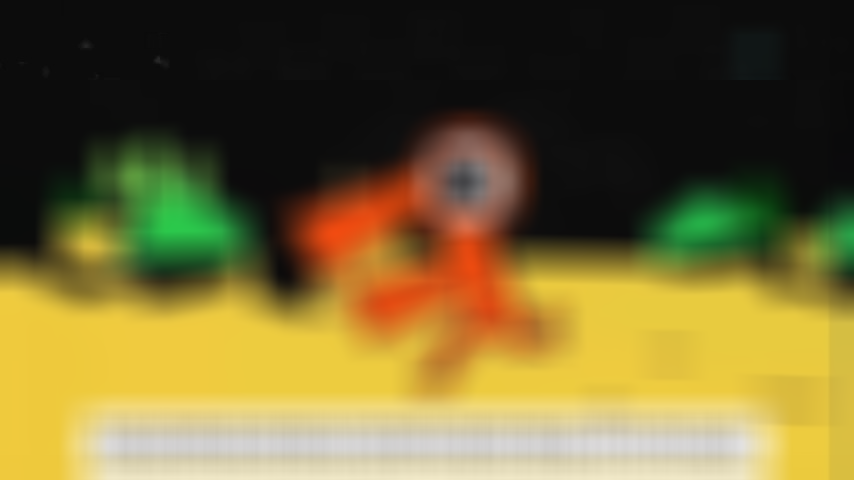

True

In [ ]:
#코너 부분 제외하고 blur 처리 해보기.

mosaic_loc = src[100: 480,  0: 854]
mosaic_loc = cv2.blur(mosaic_loc, (1, 1))
img_w_mosaic = src
img_w_mosaic[100: 480,  0: 854] = mosaic_loc


mosaic_loc = src[0:100, 200:854]
mosaic_loc = cv2.blur(mosaic_loc, (1, 1))
img_w_mosaic = src
img_w_mosaic[0:100, 200:854] = mosaic_loc

cv2.destroyAllWindows()
cv2_imshow(img_w_mosaic)

cv2.waitKey(0)

cv2.imwrite('/content/drive/MyDrive/cobig_project/blur.jpg', img_w_mosaic)

In [ ]:



mosaic_loc = img[y_pos: y_pos+height,  x_pos, x_pos+width]
mosaic_loc = cv2.blur(mosaic_loc, (50, 50))
img_w_mosaic = img
img_w_mosaic[y_pos: y_pos+height,  x_pos, x_pos+width] = mosaic_loc
cv2.destroyAllWindows()
cv2.imshow("Mosaic", img_w_mosaic)

cv2.waitKey(0)


In [ ]:
# 여기에서부터 입력하세요.
import cv2
import os






In [ ]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
import glob
ROOT_PATH = "/content/drive/MyDrive/"+ "/cobig_project"
TRAIN_IMG_PATH = ROOT_PATH + "/train1" 


train_list = glob.glob(TRAIN_IMG_PATH + '/*/*.jpg') 
print(train_list)

['/content/drive/MyDrive//cobig_project/train1/코빅엔터/3.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/6.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/9.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/18.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/24.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/36.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/30.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/15.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/27.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/33.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/21.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/12.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/39.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/48.jpg', '/content/drive/MyDrive//cobig_project/train1/코빅엔터/42.jpg', '/content/dr

In [ ]:
#program_name = ["코빅엔터", "사이코러스", "두분사망토론", "결혼해두목"]

ROOT_PATH = "/content/drive/MyDrive/cobig_project"
TRAIN_IMG_PATH = ROOT_PATH + "/train1"

코빅엔터_train_list = glob.glob(TRAIN_IMG_PATH + '/코빅엔터/*.jpg')
print(코빅엔터_train_list)

사이코러스_train_list = glob.glob(TRAIN_IMG_PATH + '/사이코러스/*.jpg')
print(사이코러스_train_list)

두분사망토론_train_list = glob.glob(TRAIN_IMG_PATH + '/두분사망토론/*.jpg')
print(두분사망토론_train_list)

결혼해두목_train_list = glob.glob(TRAIN_IMG_PATH + '/결혼해두목/*.jpg')
print(결혼해두목_train_list)

['/content/drive/MyDrive/cobig_project/train1/코빅엔터/3.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/6.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/9.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/18.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/24.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/36.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/30.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/15.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/27.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/33.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/21.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/12.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/39.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/48.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/42.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/66.jpg', '/content/drive/MyDrive/cobig_project/train1/코빅엔터/54.jpg',

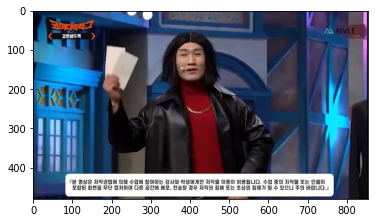

In [ ]:
img = cv2.imread('/content/drive/MyDrive//cobig_project/train1/결혼해두목/18.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
from PIL import Image
 
image1 = Image.open('/content/drive/MyDrive//cobig_project/train1/결혼해두목/18.jpg')

image1.show()

imag1_size = image1.size

width, height = imag1_size
print(width, height)

854 480


In [ ]:
from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2


In [ ]:
#코너 부분 제외하고 blur 처리 각각 적용
count = 0
for img in 코빅엔터_train_list:
    ROOT_PATH = "/content/drive/MyDrive/cobig_project"
    src = cv2.imread(img)
    mosaic_loc = src[80: 480,  0: 854]
    mosaic_loc = cv2.blur(mosaic_loc, (50, 50))
    img_w_mosaic = src
    img_w_mosaic[80: 480,  0: 854] = mosaic_loc


    mosaic_loc = src[0:80, 170:854]
    mosaic_loc = cv2.blur(mosaic_loc, (50, 50))
    img_w_mosaic = src
    img_w_mosaic[0:80, 170:854] = mosaic_loc

    cv2.destroyAllWindows()
    #cv2_imshow(img_w_mosaic)

    cv2.waitKey(0)
    filename = ROOT_PATH + "/blur_train"+ "/코빅엔터" +"/" + str(count) + ".jpg"
    cv2.imwrite(filename, img_w_mosaic)
    count = count + 1


In [ ]:
count = 0
for img in 사이코러스_train_list:
    ROOT_PATH = "/content/drive/MyDrive/"+ "/cobig_project"
    src = cv2.imread(img)
    mosaic_loc = src[80: 480,  0: 854]
    mosaic_loc = cv2.blur(mosaic_loc, (50, 50))
    img_w_mosaic = src
    img_w_mosaic[80: 480,  0: 854] = mosaic_loc


    mosaic_loc = src[0:80, 170:854]
    mosaic_loc = cv2.blur(mosaic_loc, (50, 50))
    img_w_mosaic = src
    img_w_mosaic[0:80, 170:854] = mosaic_loc

    cv2.destroyAllWindows()
    #cv2_imshow(img_w_mosaic)

    cv2.waitKey(0)
    filename = ROOT_PATH + "/blur_train"+ "/사이코러스" +"/" + str(count) + ".jpg"
    cv2.imwrite(filename, img_w_mosaic)
    count = count + 1

In [ ]:
count = 0
for img in 결혼해두목_train_list:
    ROOT_PATH = "/content/drive/MyDrive/"+ "/cobig_project"
    src = cv2.imread(img)
    mosaic_loc = src[80: 480,  0: 854]
    mosaic_loc = cv2.blur(mosaic_loc, (50, 50))
    img_w_mosaic = src
    img_w_mosaic[80: 480,  0: 854] = mosaic_loc


    mosaic_loc = src[0:80, 170:854]
    mosaic_loc = cv2.blur(mosaic_loc, (50, 50))
    img_w_mosaic = src
    img_w_mosaic[0:80, 170:854] = mosaic_loc

    cv2.destroyAllWindows()
    #cv2_imshow(img_w_mosaic)

    cv2.waitKey(0)
    filename = ROOT_PATH + "/blur_train"+ "/결혼해두목" +"/" + str(count) + ".jpg"
    cv2.imwrite(filename, img_w_mosaic)
    count = count + 1


In [ ]:
count = 0
for img in 두분사망토론_train_list:
    ROOT_PATH = "/content/drive/MyDrive/"+ "/cobig_project"
    src = cv2.imread(img)
    mosaic_loc = src[80: 480,  0: 854]
    mosaic_loc = cv2.blur(mosaic_loc, (50, 50))
    img_w_mosaic = src
    img_w_mosaic[80: 480,  0: 854] = mosaic_loc


    mosaic_loc = src[0:80, 170:854]
    mosaic_loc = cv2.blur(mosaic_loc, (50, 50))
    img_w_mosaic = src
    img_w_mosaic[0:80, 170:854] = mosaic_loc

    cv2.destroyAllWindows()
    #cv2_imshow(img_w_mosaic)

    cv2.waitKey(0)
    filename = ROOT_PATH + "/blur_train"+ "/두분사망토론" +"/" + str(count) + ".jpg"
    cv2.imwrite(filename, img_w_mosaic)
    count = count + 1


In [ ]:
src = cv2.imread("/content/drive/MyDrive//cobig_project/train/결혼해두목/18.jpg")

In [ ]:
'''
mosaic_loc = src[100: 480,  0: 854]
mosaic_loc = cv2.blur(mosaic_loc, (30, 30))
img_w_mosaic = src
    mosaic_loc = src[80: 480,  0: 854]
    mosaic_loc = cv2.blur(mosaic_loc, (25, 25))
    img_w_mosaic = src
    img_w_mosaic[80: 480,  0: 854] = mosaic_loc


    mosaic_loc = src[0:80, 170:854]
    mosaic_loc = cv2.blur(mosaic_loc, (25, 25))
    img_w_mosaic = src
    img_w_mosaic[0:80, 170:854] = mosaic_loc

cv2.destroyAllWindows()
#cv2_imshow(img_w_mosaic)

cv2.waitKey(0)

cv2.imwrite('/content/drive/MyDrive/cobig_project/blurblur.jpg', img_w_mosaic)
'''

True

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 225,
    validation_split = 0.2
)

In [ ]:
batch_size = 8
img_height = 240
img_width = 427

In [ ]:
TRAIN_PATH =  ROOT_PATH + "/blur_train"

In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    batch_size = 8,
    target_size = (img_height, img_width),
    class_mode ='categorical',
    subset = 'training'
)

Found 1616 images belonging to 4 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    subset='validation',
    batch_size = 8,
    target_size = (img_height, img_width),
    class_mode = 'categorical',
)

Found 402 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:

# 2. 모델 발판 생성
model = Sequential()

# 3. 레이어 블록 조립
model.add( Input(shape=(240, 427, 3)) )
model.add( Conv2D(filters=32,           # feature map의 수
                  kernel_size=(3,3),    # filter size
                  strides=(1,1),        # 훑는 방식 결정
                  padding='same',       # 0을 덧댄다
                  activation='relu') )  # activation 주의!

model.add( Conv2D(filters=32,         
                  kernel_size=(3,3),    
                  strides=(1,1),       
                  padding='same',      
                  activation='relu') )  

model.add( MaxPool2D(pool_size=(2,2)) ) # feature map 사이즈 절반으로 줄이기! <- (2,2)의 값 중 가장 높은 것으로
model.add( BatchNormalization() )       # 모델 학습에 유용한 레이어
model.add( Dropout(0.2) )               # 학습 과정에서 노드 일부를 일부러 제외한다

model.add( Conv2D(filters=64,           
                  kernel_size=(3,3),    
                  strides=(1,1),      
                  padding='same',       
                  activation='relu') )  
model.add( Conv2D(filters=64,           
                  kernel_size=(3,3),    
                  strides=(1,1),        
                  padding='same',       
                  activation='relu') ) 

model.add( MaxPool2D(pool_size=(2,2)) )
model.add( BatchNormalization() )       
model.add( Dropout(0.2) )

model.add( Flatten() )
model.add( Dense(128, activation='relu') )
model.add( Dense(4, activation='softmax') )

# 4. 컴파일
model.compile(loss="categorical_crossentropy", metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 427, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 427, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 213, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 120, 213, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 120, 213, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 213, 64)      1

In [ ]:
# 실습해보세요.
train_datagen = ImageDataGenerator(
    rescale = 1. / 255.,
    validation_split = .2
)

# train_genrator 생성
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    subset='training',
    shuffle=True,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical'
)

# validation_generator 생성
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    subset='validation',
    shuffle=True,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 1616 images belonging to 4 classes.
Found 402 images belonging to 4 classes.


In [ ]:
# 실습해주세요.
keras.backend.clear_session()

model = Sequential([
# Conv2D, MaxPooling2D 조합으로 층을 쌓습니다. 첫번째 입력층의 input_shape은 imageDataGenerator target size로 지정합니다.
  Conv2D(input_shape=(320, 96, 3), filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

  Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

  Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

  Flatten(),
  Dense(4096, activation='relu'),
  Dense(4096, activation='relu'),
  Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 320, 96, 64)       1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 320, 96, 64)       36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 160, 48, 64)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 160, 48, 128)      73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 160, 48, 128)      147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 80, 24, 128)      0         
 2D)                                                    

In [ ]:
ROOT_PATH = "/content/drive/MyDrive/"+ "/cobig_project"
MODEL_PATH = ROOT_PATH + '/model_weights'

In [ ]:
# 실습해보세요.
# 모델 컴파일 
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['categorical_accuracy']
)

# checkpoint 
checkpoint = ModelCheckpoint(
  filepath=MODEL_PATH,
  monitor='val_loss',
  # verbose=1,
  save_best_only=True,
  save_weights_only=False
)

# early_stopping
early_stopping = EarlyStopping(
  monitor = 'val_loss',
  min_delta = 0,
  patience = 7,
  verbose = 1,
  restore_best_weights = True
)


In [ ]:
es = EarlyStopping(
  monitor = 'val_loss',
  min_delta = 0,
  patience = 5,
  verbose = 1,
  restore_best_weights = True
)

In [ ]:
hist = model.fit(
  train_generator,
  validation_data=validation_generator,
  callbacks = [checkpoint, es],
  verbose = 1,
  epochs = 100
)

Epoch 1/100
202/202 [==============================] - 349s 2s/step - loss: 6.2812 - categorical_accuracy: 0.4579 - val_loss: 1.8413 - val_categorical_accuracy: 0.3259
Epoch 2/100
202/202 [==============================] - 26s 127ms/step - loss: 1.3944 - categorical_accuracy: 0.5074 - val_loss: 1.5569 - val_categorical_accuracy: 0.3333
Epoch 3/100
202/202 [==============================] - 26s 128ms/step - loss: 1.0538 - categorical_accuracy: 0.6231 - val_loss: 0.9229 - val_categorical_accuracy: 0.5771
Epoch 4/100
202/202 [==============================] - 26s 129ms/step - loss: 0.7149 - categorical_accuracy: 0.6770 - val_loss: 0.7779 - val_categorical_accuracy: 0.6692
Epoch 5/100
202/202 [==============================] - 26s 130ms/step - loss: 0.5490 - categorical_accuracy: 0.7927 - val_loss: 0.2460 - val_categorical_accuracy: 0.9975
Epoch 6/100
202/202 [==============================] - 26s 130ms/step - loss: 0.2281 - categorical_accuracy: 0.9957 - val_loss: 0.2004 - val_categorical

In [ ]:
MODEL_PATH = "/content/drive/MyDrive/cobig_project/model"

model.save(MODEL_PATH + "/blur_model.h5")

In [ ]:
from sklearn.metrics import f1_score

y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
scr = f1_score(validation_generator.labels, y_pred, average='micro')

print(f'F1 Score: {scr:.3f}')

F1 Score: 0.219


In [ ]:
코빅엔터_test_list = glob.glob("/content/drive/MyDrive/cobig_project/testtest1/testtest"+ '/*.jpg')
print(코빅엔터_test_list)

['/content/drive/MyDrive/cobig_project/testtest1/testtest/9.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/6.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/12.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/3.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/42.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/21.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/18.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/24.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/36.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/15.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/30.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/39.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/33.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/27.jpg', '/content/drive/MyDrive/cobig_project/testtest1/testtest/45.jpg', '/content/dr

In [ ]:
count = 0
for img in 코빅엔터_test_list:
    ROOT_PATH = "/content/drive/MyDrive/cobig_project"
    src = cv2.imread(img)
    mosaic_loc = src[80: 480,  0: 854]
    mosaic_loc = cv2.blur(mosaic_loc, (50, 50))
    img_w_mosaic = src
    img_w_mosaic[80: 480,  0: 854] = mosaic_loc


    mosaic_loc = src[0:80, 170:854]
    mosaic_loc = cv2.blur(mosaic_loc, (50, 50))
    img_w_mosaic = src
    img_w_mosaic[0:80, 170:854] = mosaic_loc

    cv2.destroyAllWindows()
    #cv2_imshow(img_w_mosaic)

    cv2.waitKey(0)
    filename = "/content/drive/MyDrive/cobig_project/blur_test/blur_testfile" +"/" + str(count) + ".jpg"
    cv2.imwrite(filename, img_w_mosaic)
    count = count + 1

In [ ]:
TEST_PATH = "/content/drive/MyDrive/cobig_project/blur_test"

In [ ]:
test_generator = train_datagen.flow_from_directory(
    TEST_PATH,
    batch_size=batch_size,
    target_size=(img_height, img_width),
    class_mode='categorical',
    shuffle=False)

Found 939 images belonging to 1 classes.


In [ ]:


batch_size = 8
img_height = 240
img_width = 427

test_datagen = ImageDataGenerator(
    rescale=1./255.
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    batch_size=batch_size,
    
    class_mode='categorical',
    shuffle=False)

Found 939 images belonging to 1 classes.


In [ ]:
def my_model_predict(test_generator, MODEL_PATH):
  import numpy as np
  import pandas as pd
  import tensorflow as tf
  from tensorflow import keras
  import os

  model = keras.models.load_model(MODEL_PATH)
  # model.summary()
  test_generator.reset()
  pred = model.predict(test_generator)
  pred = np.argmax(pred, axis=1)

  fn = test_generator.filenames
  filename = [os.path.splitext(os.path.basename(x))[0] for x in fn]

  predict_df = pd.DataFrame({
      'filename': filename,
      'y_pred': pred
  })

  return predict_df

In [ ]:
#MODEL_PATH = "/content/drive/MyDrive/cobig_project/model"

#model.save(MODEL_PATH + "/blur_model.h5")
MODEL_PATH = "/content/drive/MyDrive/cobig_project/model"+"/blur_model.h5"

In [ ]:
import pandas as pd
 
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
my_model_predict(test_generator, MODEL_PATH)

In [ ]:
def predict_to_table(predict_df):
    from datetime import datetime, timedelta
    classes = pd.Series({0: '결혼해두목', 1: '두분사망토론', 2: '사이코러스', 3: '코빅엔터'})
    
    predict_df['y_pred'] = predict_df['y_pred'].map(classes)
    predict_df['filename'] = predict_df['filename'].astype('int')
    predict_df.sort_values(by='filename', ignore_index=True, inplace=True)
    predict_df['filename'] = pd.to_datetime(predict_df['filename'], unit='s')
    predict_df['filename'] = predict_df['filename'].dt.time

    predict_df['next'] = predict_df['y_pred'].shift(1)
    predict_df.loc[0, 'next'] = predict_df.loc[0, 'y_pred']
    predict_df['TF'] = (predict_df['next'] == predict_df['y_pred'])

    df_rows = predict_df.shape[0]

    df = pd.DataFrame(columns=['corner', 'startTime', 'endTime'])
    p = pd.DataFrame({'corner': predict_df.loc[0, 'y_pred'], 'startTime': predict_df.loc[0, 'filename'], 'endTime': ''}, index=[0])

    for row in range(df_rows):
        if row == df_rows - 1:
            if predict_df.loc[row, 'TF']:
                p.loc[0, 'endTime'] = predict_df.loc[row, 'filename']
                df = pd.concat([df, p], axis=0)
            else:
                tmp = predict_df.loc[row, 'filename']
                tmp = datetime(100, 1, 1, tmp.hour, tmp.minute, tmp.second)
                tmp += timedelta(seconds=-1)
                tmp = tmp.time()
                p.loc[0, 'endTime'] = tmp
                df = pd.concat([df, p], axis=0)

                p.loc[0, 'corner'] = predict_df.loc[row, 'y_pred']
                p.loc[0, 'startTime'] = predict_df.loc[row, 'filename']
                p.loc[0, 'endTime'] = predict_df.loc[row, 'filename']
                df = pd.concat([df, p], axis=0)
        
        if predict_df.loc[row, 'TF'] == False:
            tmp = predict_df.loc[row, 'filename']
            tmp = datetime(100, 1, 1, tmp.hour, tmp.minute, tmp.second)
            tmp += timedelta(seconds=-1)
            tmp = tmp.time()
            p.loc[0, 'endTime'] = tmp
            df = pd.concat([df, p], axis=0)

            p.loc[0, 'corner'] = predict_df.loc[row, 'y_pred']
            p.loc[0, 'startTime'] = predict_df.loc[row, 'filename']
    
    df.reset_index()
    
    return df

In [ ]:
predict_to_table(my_model_predict(test_generator, MODEL_PATH))

,corner,startTime,endTime
0,코빅엔터,00:00:00,00:04:56
0,사이코러스,00:04:57,00:04:57
0,코빅엔터,00:04:58,00:05:02
0,사이코러스,00:05:03,00:07:54
0,결혼해두목,00:07:55,00:12:20
0,사이코러스,00:12:21,00:12:21
0,결혼해두목,00:12:22,00:12:22
0,두분사망토론,00:12:23,00:15:38


In [ ]:
def predict_to_table(p_df):
    from datetime import datetime, timedelta
    classes = pd.Series({0: '결혼해두목', 1: '두분사망토론', 2: '사이코러스', 3: '코빅엔터'})
    predict_df = p_df.copy()
    predict_df['y_pred'] = predict_df['y_pred'].map(classes)
    predict_df['filename'] = predict_df['filename'].astype('int')
    predict_df.sort_values(by='filename', ignore_index=True, inplace=True)
    predict_df['filename'] = pd.to_datetime(predict_df['filename'], unit='s')
    predict_df['filename'] = predict_df['filename'].dt.time

    predict_df['next'] = predict_df['y_pred'].shift(1)
    predict_df.loc[0, 'next'] = predict_df.loc[0, 'y_pred']
    predict_df['TF'] = (predict_df['next'] == predict_df['y_pred'])

    df_rows = predict_df.shape[0]

    df = pd.DataFrame(columns=['corner', 'startTime', 'endTime'])
    p = pd.DataFrame({'corner': predict_df.loc[0, 'y_pred'], 'startTime': predict_df.loc[0, 'filename'], 'endTime': ''}, index=[0])

    for row in range(df_rows):
        if row == df_rows - 1:
            if predict_df.loc[row, 'TF']:
                p.loc[0, 'endTime'] = predict_df.loc[row, 'filename']
                df = pd.concat([df, p], axis=0)
            else:
                tmp = predict_df.loc[row, 'filename']
                tmp = datetime(100, 1, 1, tmp.hour, tmp.minute, tmp.second)
                tmp += timedelta(seconds=-1)
                tmp = tmp.time()
                p.loc[0, 'endTime'] = tmp
                df = pd.concat([df, p], axis=0)

                p.loc[0, 'corner'] = predict_df.loc[row, 'y_pred']
                p.loc[0, 'startTime'] = predict_df.loc[row, 'filename']
                p.loc[0, 'endTime'] = predict_df.loc[row, 'filename']
                df = pd.concat([df, p], axis=0)
        
        if predict_df.loc[row, 'TF'] == False:
            tmp = predict_df.loc[row, 'filename']
            tmp = datetime(100, 1, 1, tmp.hour, tmp.minute, tmp.second)
            tmp += timedelta(seconds=-1)
            tmp = tmp.time()
            p.loc[0, 'endTime'] = tmp
            df = pd.concat([df, p], axis=0)

            p.loc[0, 'corner'] = predict_df.loc[row, 'y_pred']
            p.loc[0, 'startTime'] = predict_df.loc[row, 'filename']
    
    df.reset_index(inplace=True, drop=True)
    
    return df

In [ ]:
def acc(predict_df):
  predict_df['filename'] = predict_df['filename'].astype(int)

  df_sorted = predict_df.sort_values(by='filename')
  df_sorted = df_sorted.reset_index(drop=True)

  # 9 = NaN
  li = [0]*941
  for i in range(941):
    if i == 0:
      li[i] = 1
    elif (1<=i) and (i<=303):
      li[i] = 3
    elif i == 304:
      li[i] = 9
    elif (305<=i) and (i<=475):
      li[i] = 2
    elif i == 476:
      li[i] = 9
    elif (477<=i) and (i<=743):
      li[i] = 0
    elif i == 745:
      li[i] = 9
    else:
      li[i] = 1
    
  df_true =  pd.DataFrame({'true' : li})
  df_test = pd.concat([df_sorted, df_true], axis = 1)

  correct = df_test.loc[df_test['y_pred']==df_test['true']]
  accuracy = len(correct)/len(df_test) *100

  return accuracy

In [ ]:
acc(my_model_predict(test_generator, MODEL_PATH))

98.83103081827844